In [29]:
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import matplotlib.colors as plc
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set_context('talk')

In [25]:
# import matplotlib.pyplot as plt

# SMALL_SIZE = 8
# MEDIUM_SIZE = 10
# BIGGER_SIZE = 12

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Plot indice S&P500

In [90]:
sp500_hist = pd.read_csv('./datasets/sp500-index.csv')
sp500_hist.loc[:, 'Date'] = pd.to_datetime(sp500_hist.loc[:, 'Date'], format="%Y-%m-%d")
sp500_hist.index = sp500_hist['Date']
sp500_hist = sp500_hist.loc[:, 'Adj Close']

t0 = datetime.datetime(1990, 1, 1)
t_paper = datetime.datetime(2005, 1, 1)
t_end = datetime.datetime(2018, 11, 16)
sp500_hist = sp500_hist[sp500_hist.index >= t0]
sp500_paper = sp500_hist[(sp500_hist.index >= t_paper) & (sp500_hist.index <= t_end)]

In [98]:
dot_com_start = datetime.datetime(2000, 1, 1)
dot_com_end = datetime.datetime(2003, 12, 31)

data = sp500_hist[(sp500_hist.index >= dot_com_start) & (sp500_hist.index <= dot_com_end)]
print(data.idxmax(), data.max())
print(data.idxmin(), data.min())

2000-03-24 00:00:00 1527.459961
2002-10-09 00:00:00 776.76001


In [99]:
subprime_start = datetime.datetime(2007, 1, 1)
subprime_end = datetime.datetime(2009, 12, 31)

data = sp500_hist[(sp500_hist.index >= subprime_start) & (sp500_hist.index <= subprime_end)]
print(data.idxmax(), data.max())
print(data.idxmin(), data.min())

2007-10-09 00:00:00 1565.150024
2009-03-09 00:00:00 676.530029


In [100]:
eu_start = datetime.datetime(2009, 10, 1)
eu_end = datetime.datetime(2014, 10, 31)

data = sp500_hist[(sp500_hist.index >= eu_start) & (sp500_hist.index <= eu_end)]
print(data.idxmax(), data.max())
print(data.idxmin(), data.min())

2014-10-31 00:00:00 2018.050049
2010-07-02 00:00:00 1022.580017


In [115]:
log_returns_paper = np.log(sp500_paper).diff(periods=1).iloc[1:]
d = log_returns_paper.describe()
d

count    3494.000000
mean        0.000235
std         0.011772
min        -0.094695
25%        -0.003904
50%         0.000653
75%         0.005279
max         0.109572
Name: Adj Close, dtype: float64

In [116]:
np.log(sp500_paper.iloc[-1] - sp500_paper.iloc[0])

7.335757875164764

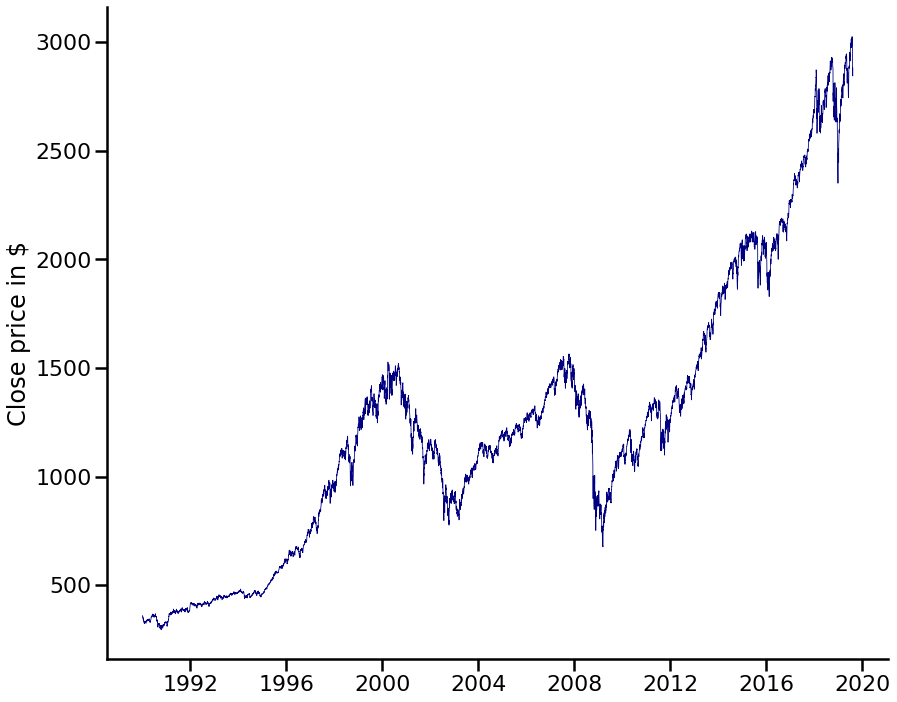

In [91]:
sns.set_context('poster')

fig, ax = pl.subplots(nrows=1, ncols=1, figsize=(14, 12))
ax.plot(sp500_hist, color='navy', linewidth=0.8)
ax.set_ylabel('Close price in $')
# ax.set_ylim([0, 3000])
sns.despine()

pl.savefig("./gfx/dataset/sp500-history.png", bbox_inches='tight', transparent=True)

In [108]:
# i log-returns
log_returns = np.log(sp500_hist).diff(periods=1).iloc[1:]

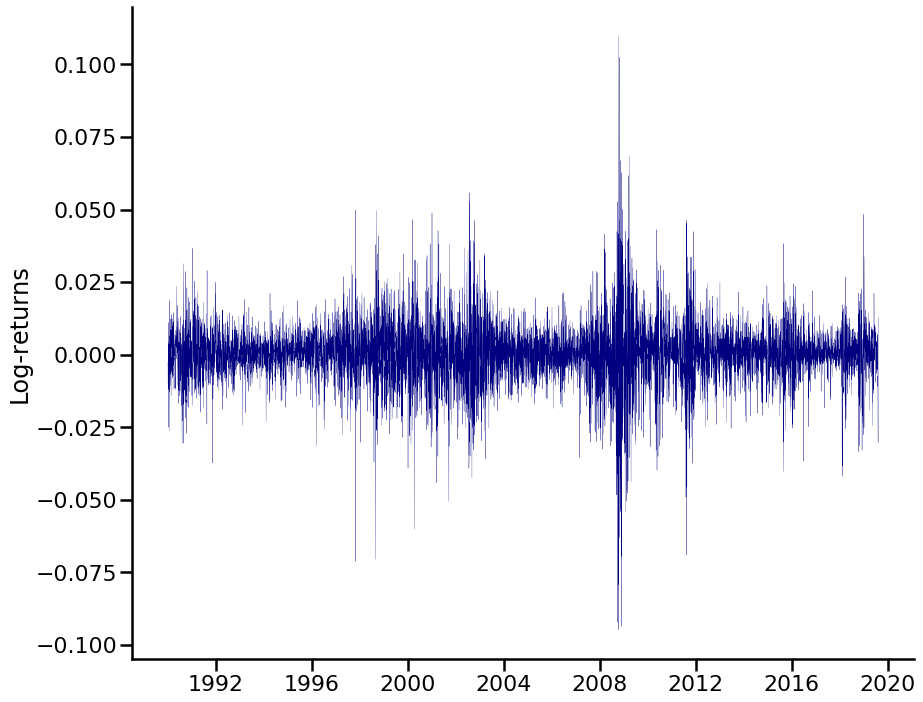

In [109]:
fig, ax = pl.subplots(nrows=1, ncols=1, figsize=(14, 12))
ax.plot(log_returns, color='navy', linewidth=0.25)
ax.set_ylabel('Log-returns')
# ax.set_ylim([0, 3000])
sns.despine()

pl.savefig("./gfx/dataset/sp500-history-log-return.png", bbox_inches='tight', transparent=True)

# Sentiment data

In [ ]:
impact = pd.read_csv('/Users/pietro/Google Drive/OptiRisk Thesis/data/sentiment/')